In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings
#used for plots
from scipy import stats
from mplsoccer import PyPizza, FontManager

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("germany_defender_radardata.csv", index_col=0)
df

,playerId,minutesPlayed,ground_duels_won,ground_duels,fouls_committed,air_duels,air_duels_won,duels_won_own_half,fouls_committed_own_half,interceptions,...,ground_duels_won_adjusted_per90,ground_duels_adjusted_per90,fouls_committed_adjusted_per90,air_duels_adjusted_per90,air_duels_won_adjusted_per90,duels_won_own_half_adjusted_per90,fouls_committed_own_half_adjusted_per90,interceptions_adjusted_per90,vs_dribbles_adjusted_per90,won_vs_dribbles_adjusted_per90
0,77,2326,38.0,150.0,33.0,84.0,39.0,64.0,23.0,14.0,...,2.862912,11.300969,2.486213,6.328543,2.938252,4.821747,1.732815,1.054757,5.047766,1.130097
1,11095,2749,50.0,208.0,21.0,128.0,71.0,100.0,14.0,7.0,...,3.053889,12.704180,1.282634,7.817957,4.336523,6.107779,0.855089,0.427545,4.825145,1.038322
2,15771,1427,23.0,98.0,14.0,68.0,49.0,53.0,7.0,9.0,...,2.795890,11.912921,1.701846,8.266108,5.956460,6.442702,0.850923,1.094044,5.834900,1.094044
3,51217,2615,40.0,174.0,26.0,100.0,47.0,53.0,8.0,14.0,...,2.606748,11.339354,1.694386,6.516870,3.062929,3.453941,0.521350,0.912362,4.692146,0.977530
4,82340,2923,46.0,253.0,41.0,229.0,110.0,89.0,20.0,14.0,...,2.695810,14.826952,2.402787,13.420443,6.446501,5.215805,1.172091,0.820464,5.039992,0.761859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,216074,3163,47.0,215.0,23.0,49.0,13.0,50.0,11.0,15.0,...,2.417032,11.056634,1.182803,2.519884,0.668541,2.571310,0.565688,0.771393,4.936916,0.925672
120,255732,888,9.0,48.0,9.0,31.0,15.0,18.0,7.0,2.0,...,1.556275,8.300132,1.556275,5.360502,2.593791,3.112549,1.210436,0.345839,3.631308,0.864597
121,272378,2009,41.0,181.0,22.0,49.0,24.0,48.0,11.0,6.0,...,3.441047,15.190964,1.846415,4.112471,2.014271,4.028543,0.923208,0.503568,7.973158,1.762488
122,336829,1997,32.0,121.0,30.0,140.0,83.0,84.0,20.0,14.0,...,2.648590,10.014982,2.483053,11.587583,6.869781,6.952550,1.655369,1.158758,3.393506,0.579379


In [3]:
targets = df.sort_values("interceptions_adjusted_per90", ascending=False).iloc[:10][['shortName','teamName','interceptions_adjusted_per90','minutesPlayed']]
targets['position'] = ['CB','CB','CB','LB','RB','RB','CB','CB','CB','LB']
targets['value'] = [5,45,17.5,8,12,5,60,5,18,18]
targets['age'] = [18,28,26,25,20,18,28,25,18,23]
targets

,shortName,teamName,interceptions_adjusted_per90,minutesPlayed,position,value,age
43,D. Zagadou,Borussia Dortmund,2.274931,678,CB,5.0,18
22,J. Boateng,Bayern M\u00fcnchen,1.912228,1668,CB,45.0,28
28,Bartra,Real Betis,1.865074,847,CB,17.5,26
96,M. Halstenberg,RB Leipzig,1.826953,1216,LB,8.0,25
65,B. Henrichs,Bayer Leverkusen,1.632233,1314,RB,12.0,20
94,R. Oxford,Borussia M'gladbach,1.584711,484,RB,5.0,18
25,M. Hummels,Bayern M\u00fcnchen,1.579069,2256,CB,60.0,28
57,K. Papadopoulos,Hamburger SV,1.534349,2707,CB,5.0,25
66,P. Retsos,Bayer Leverkusen,1.439662,1774,CB,18.0,18
40,Rapha\u00ebl Guerreiro,Borussia Dortmund,1.439266,569,LB,18.0,23


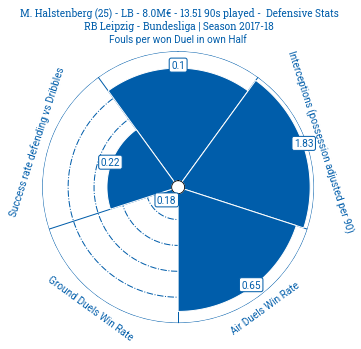

In [13]:
target = targets.loc[targets.shortName == "M. Halstenberg"]
player = target.iloc[0,0]
player_df = df.loc[df["shortName"] == player]
player_df = player_df[["minutesPlayed","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"]]
nineties = round(player_df.iloc[0,0]/90,2)
player_columns = player_df.columns[1:]
player_values = [round(player_df[column].iloc[0],2) for column in player_columns]
percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
percentiles[0] = 100 - percentiles[0]

#list of names on plots
names = ["Fouls per won Duel in own Half", "Interceptions (possession adjusted per 90)", "Air Duels Win Rate", "Ground Duels Win Rate", "Success rate defending vs Dribbles"]
slice_colors = ["#005DAA"] * 5
text_colors = ["#005DAA"]*5
textbox_colors = ["white"]*5
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    background_color="white",
    straight_line_color="#005DAA",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#005DAA",
    last_circle_lw=1,               # linewidth of last circle
    other_circle_color="#005DAA",
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

#making pizza for our data
fig, ax = baker.make_pizza(
    percentiles,              # list of values
    figsize=(5, 5),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=textbox_colors, # where the parameters will be added
#    color_blank_space=["#005DAA"]*5,
#    blank_alpha=1,
    kwargs_slices=dict(
        facecolor="#005DAA", edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            facecolor="white",edgecolor="#005DAA",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

team = target.iloc[0,1]
position = target.iloc[0,4]
value = target.iloc[0,5]
age = target.iloc[0,6]

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(player_values[i]))
# add title
fig.text(
    0.515, 0.98, f"{player} ({age}) - {position} - {value}M€ - {nineties} 90s played -  Defensive Stats", size=30,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)

# add subtitle
fig.text(
    0.515, 0.942,
    f"{team} - Bundesliga | Season 2017-18",
    size=21,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)
plt.savefig(f"{player}_radar.png")
plt.show()

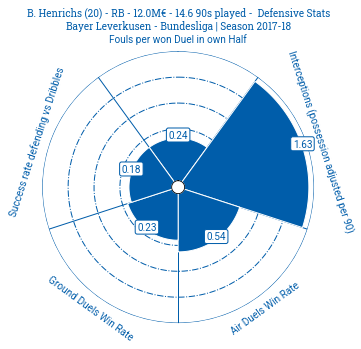

In [12]:
target = targets.loc[targets.shortName == "B. Henrichs"]
player = target.iloc[0,0]
player_df = df.loc[df["shortName"] == player]
player_df = player_df[["minutesPlayed","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"]]
nineties = round(player_df.iloc[0,0]/90,2)
player_columns = player_df.columns[1:]
player_values = [round(player_df[column].iloc[0],2) for column in player_columns]
percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
percentiles[0] = 100 - percentiles[0]

#list of names on plots
names = ["Fouls per won Duel in own Half", "Interceptions (possession adjusted per 90)", "Air Duels Win Rate", "Ground Duels Win Rate", "Success rate defending vs Dribbles"]
slice_colors = ["#005DAA"] * 5
text_colors = ["#005DAA"]*5
textbox_colors = ["white"]*5
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    background_color="white",
    straight_line_color="#005DAA",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#005DAA",
    last_circle_lw=1,               # linewidth of last circle
    other_circle_color="#005DAA",
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

#making pizza for our data
fig, ax = baker.make_pizza(
    percentiles,              # list of values
    figsize=(5, 5),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=textbox_colors, # where the parameters will be added
    #    color_blank_space=["#005DAA"]*5,
    #    blank_alpha=1,
    kwargs_slices=dict(
        facecolor="#005DAA", edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            facecolor="white",edgecolor="#005DAA",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

team = target.iloc[0,1]
position = target.iloc[0,4]
value = target.iloc[0,5]
age = target.iloc[0,6]

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(player_values[i]))
# add title
fig.text(
    0.515, 0.98, f"{player} ({age}) - {position} - {value}M€ - {nineties} 90s played -  Defensive Stats", size=30,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)

# add subtitle
fig.text(
    0.515, 0.942,
    f"{team} - Bundesliga | Season 2017-18",
    size=21,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)
plt.savefig(f"{player}_radar.png")
plt.show()

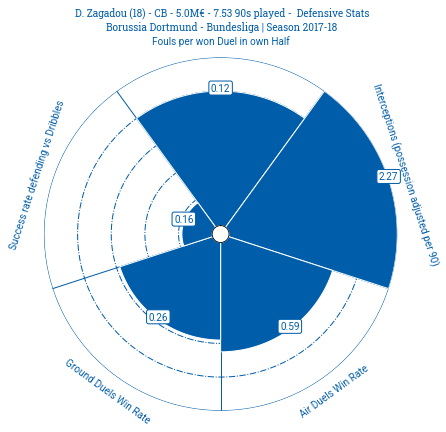

In [22]:
target = targets.loc[targets.shortName == "D. Zagadou"]
player = target.iloc[0,0]
player_df = df.loc[df["shortName"] == player]
player_df = player_df[["minutesPlayed","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"]]
nineties = round(player_df.iloc[0,0]/90,2)
player_columns = player_df.columns[1:]
player_values = [round(player_df[column].iloc[0],2) for column in player_columns]
percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
percentiles[0] = 100 - percentiles[0]

#list of names on plots
names = ["Fouls per won Duel in own Half", "Interceptions (possession adjusted per 90)", "Air Duels Win Rate", "Ground Duels Win Rate", "Success rate defending vs Dribbles"]
slice_colors = ["#005DAA"] * 5
text_colors = ["#005DAA"]*5
textbox_colors = ["white"]*5
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    background_color="white",
    straight_line_color="#005DAA",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#005DAA",
    last_circle_lw=1,               # linewidth of last circle
    other_circle_color="#005DAA",
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

#making pizza for our data
fig, ax = baker.make_pizza(
    percentiles,              # list of values
    figsize=(6.5, 6.5),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=textbox_colors, # where the parameters will be added
    #    color_blank_space=["#005DAA"]*5,
    #    blank_alpha=1,
    kwargs_slices=dict(
        facecolor="#005DAA", edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            facecolor="white",edgecolor="#005DAA",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

team = target.iloc[0,1]
position = target.iloc[0,4]
value = target.iloc[0,5]
age = target.iloc[0,6]

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(player_values[i]))
# add title
fig.text(
    0.515, 0.97, f"{player} ({age}) - {position} - {value}M€ - {nineties} 90s played -  Defensive Stats", size=30,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)

# add subtitle
fig.text(
    0.515, 0.938,
    f"{team} - Bundesliga | Season 2017-18",
    size=21,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)
plt.savefig(f"{player}_radar.png")
plt.show()

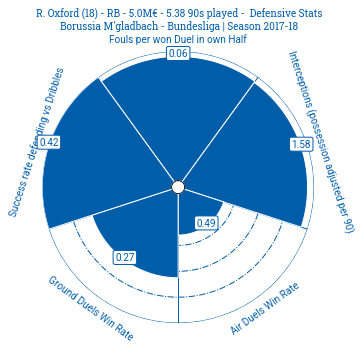

In [14]:
target = targets.loc[targets.shortName == "R. Oxford"]
player = target.iloc[0,0]
player_df = df.loc[df["shortName"] == player]
player_df = player_df[["minutesPlayed","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"]]
nineties = round(player_df.iloc[0,0]/90,2)
player_columns = player_df.columns[1:]
player_values = [round(player_df[column].iloc[0],2) for column in player_columns]
percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
percentiles[0] = 100 - percentiles[0]

#list of names on plots
names = ["Fouls per won Duel in own Half", "Interceptions (possession adjusted per 90)", "Air Duels Win Rate", "Ground Duels Win Rate", "Success rate defending vs Dribbles"]
slice_colors = ["#005DAA"] * 5
text_colors = ["#005DAA"]*5
textbox_colors = ["white"]*5
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    background_color="white",
    straight_line_color="#005DAA",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#005DAA",
    last_circle_lw=1,               # linewidth of last circle
    other_circle_color="#005DAA",
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

#making pizza for our data
fig, ax = baker.make_pizza(
    percentiles,              # list of values
    figsize=(5, 5),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=textbox_colors, # where the parameters will be added
    #    color_blank_space=["#005DAA"]*5,
    #    blank_alpha=1,
    kwargs_slices=dict(
        facecolor="#005DAA", edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            facecolor="white",edgecolor="#005DAA",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

team = target.iloc[0,1]
position = target.iloc[0,4]
value = target.iloc[0,5]
age = target.iloc[0,6]

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(player_values[i]))
# add title
fig.text(
    0.515, 0.98, f"{player} ({age}) - {position} - {value}M€ - {nineties} 90s played -  Defensive Stats", size=30,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)

# add subtitle
fig.text(
    0.515, 0.942,
    f"{team} - Bundesliga | Season 2017-18",
    size=21,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)
plt.savefig(f"{player}_radar.png")
plt.show()

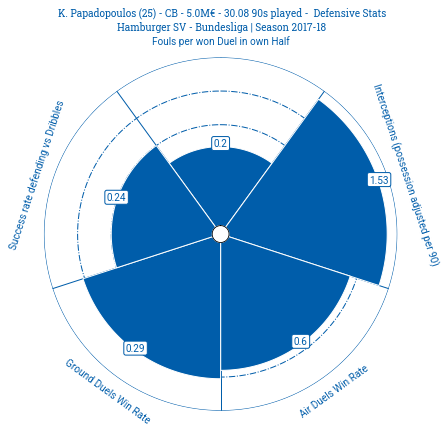

In [24]:
target = targets.loc[targets.shortName == "K. Papadopoulos"]
player = target.iloc[0,0]
player_df = df.loc[df["shortName"] == player]
player_df = player_df[["minutesPlayed","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"]]
nineties = round(player_df.iloc[0,0]/90,2)
player_columns = player_df.columns[1:]
player_values = [round(player_df[column].iloc[0],2) for column in player_columns]
percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
percentiles[0] = 100 - percentiles[0]

#list of names on plots
names = ["Fouls per won Duel in own Half", "Interceptions (possession adjusted per 90)", "Air Duels Win Rate", "Ground Duels Win Rate", "Success rate defending vs Dribbles"]
slice_colors = ["#005DAA"] * 5
text_colors = ["#005DAA"]*5
textbox_colors = ["white"]*5
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    background_color="white",
    straight_line_color="#005DAA",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#005DAA",
    last_circle_lw=1,               # linewidth of last circle
    other_circle_color="#005DAA",
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

#making pizza for our data
fig, ax = baker.make_pizza(
    percentiles,              # list of values
    figsize=(6.5, 6.5),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=textbox_colors, # where the parameters will be added
    #    color_blank_space=["#005DAA"]*5,
    #    blank_alpha=1,
    kwargs_slices=dict(
        facecolor="#005DAA", edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            facecolor="white",edgecolor="#005DAA",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

team = target.iloc[0,1]
position = target.iloc[0,4]
value = target.iloc[0,5]
age = target.iloc[0,6]

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(player_values[i]))
# add title
fig.text(
    0.515, 0.97, f"{player} ({age}) - {position} - {value}M€ - {nineties} 90s played -  Defensive Stats", size=30,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)

# add subtitle
fig.text(
    0.515, 0.938,
    f"{team} - Bundesliga | Season 2017-18",
    size=21,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)
plt.savefig(f"{player}_radar.png")
plt.show()